#auto MPG dataset
This dataset is a slightly modified version of the dataset provided in the StatLib library.The data concerns city-cycle fuel consumption in miles per gallon,to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

###Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.
   
   (b) Date: July 7, 1993

For more information go to [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/9/auto+mpg)

###uasage:
Predicting MPG from car's attributes, education, etc.


###Attribute Information:
mpg: Continuous value representing the mileage per gallon performance of the cars

cylinders: Multi-valued discrete attribute indicating the number of cylinders in the engine

displacement: Continuous value representing the engine displacement

horsepower: Continuous value indicating the horsepower of the car

weight: Continuous value representing the weight of the car

acceleration: Continuous value representing the acceleration performance

model-year: Multi-valued discrete attribute indicating the year the car model was produced

origin: Multi-valued discrete attribute that indicates where each car was manufactured or produced (1.USA, 2.Japan, 3.europe)

car-name: A unique string identifier for each car instance that represent the car name

###Missing Attribute Values:  
horsepower has 6 missing values



In [ ]:
import numpy as np
import pandas as pd

column_names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year', 'origin', 'car-name']
df = pd.read_csv('/content/auto-mpg.csv.data', delimiter="\s+", names=column_names)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model-year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car-name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


Number of Instances:

In [ ]:
df.shape

(398, 9)

In [ ]:
df.size

3582

In [ ]:
#summarize the data
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model-year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [ ]:
#main dataset in 'horsepower' column have sum null values,so use it's alternative test(null values fixed)
column_names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year', 'origin', 'car-name']
test= pd.read_csv('/content/test.data', delimiter="\s+", names=column_names)
print(test.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model-year  origin                   car-name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [ ]:
#outlier percentage
for k, v in test.items():
  if(isinstance(v, str)):
    break
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  outlier = v[(v.le(q1 - 1.5 * iqr)) | (v.ge(q3 + 1.5 * iqr))]
  percentage = np.shape(outlier)[0] * 100 / np.shape(df)[0]
  print("column %s outliers = %.2f%%" % (k, percentage))

column mpg outliers = 0.25%
column cylinders outliers = 0.00%
column displacement outliers = 0.00%
column horsepower outliers = 2.76%
column weight outliers = 0.00%
column acceleration outliers = 2.26%
column model-year outliers = 0.00%
column origin outliers = 0.00%


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
df = df[~(df['mpg'] >= 46.6)]
print(np.shape(df))

(397, 9)


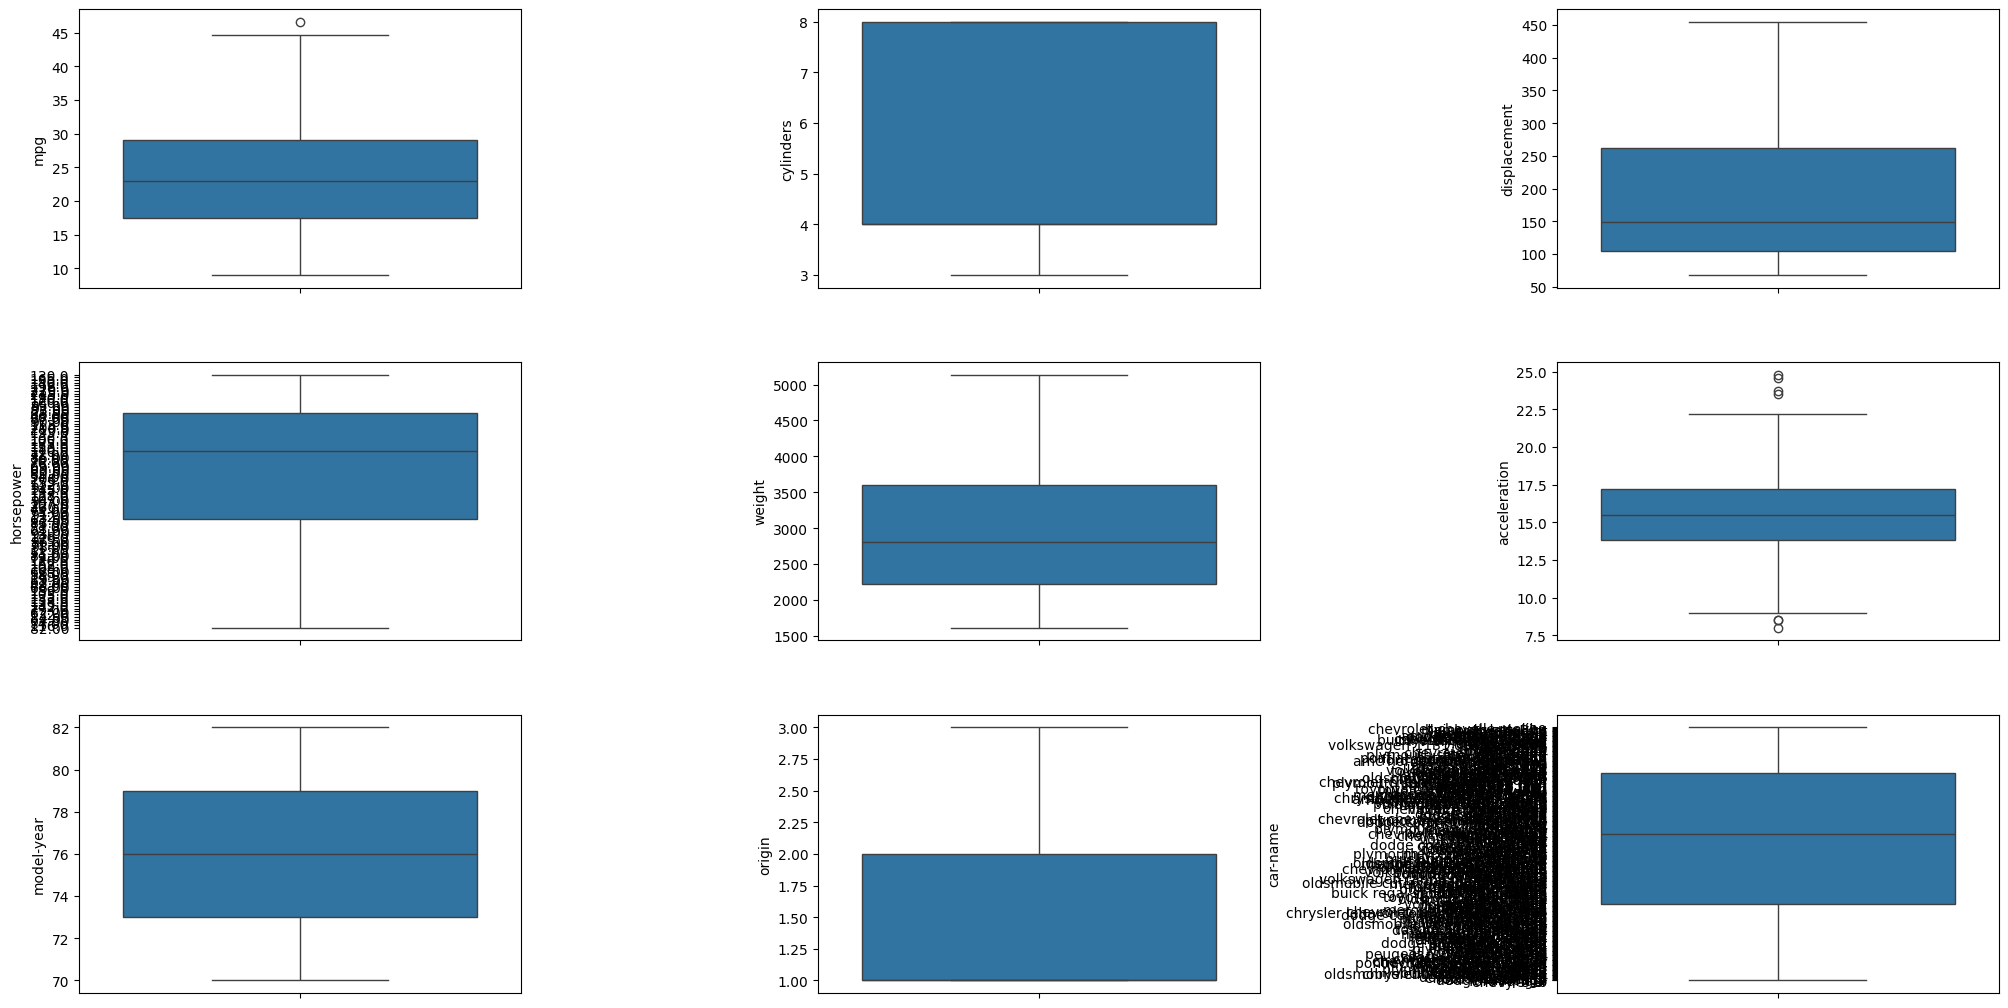

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
index = 0
axs = axs.flatten()
for k, v in df.items():
  sns.boxplot(y=k, data=df, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

(array([ 7., 26., 54., 40., 44., 37., 37., 35., 33., 29., 23., 15.,  9.,
         3.,  5.]),
 array([ 9.        , 11.37333333, 13.74666667, 16.12      , 18.49333333,
        20.86666667, 23.24      , 25.61333333, 27.98666667, 30.36      ,
        32.73333333, 35.10666667, 37.48      , 39.85333333, 42.22666667,
        44.6       ]),
 <BarContainer object of 15 artists>)

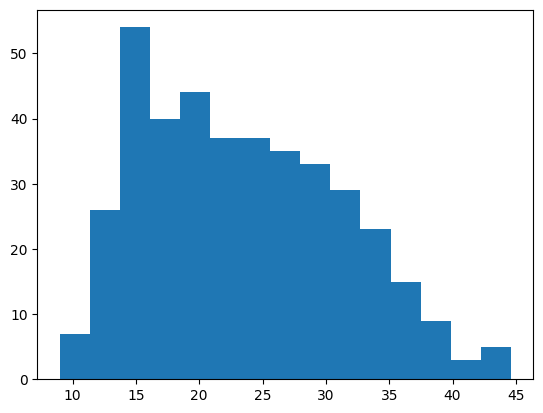

In [ ]:
plt.hist(df['mpg'], bins=15)

ValueError: could not convert string to float: 'ford pinto'

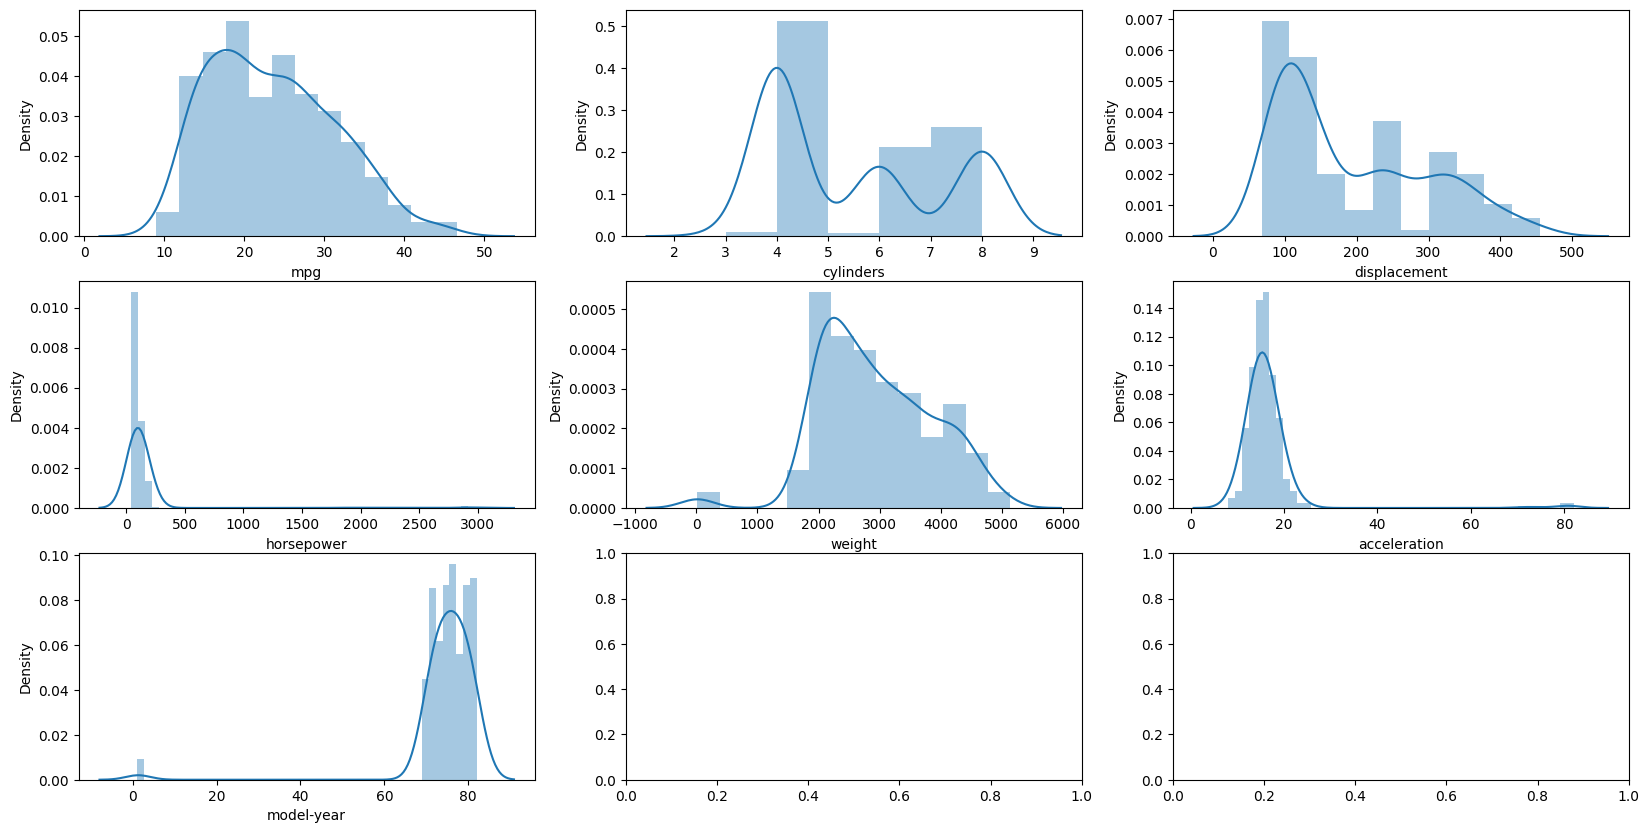

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in test.items():
  sns.distplot(v, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

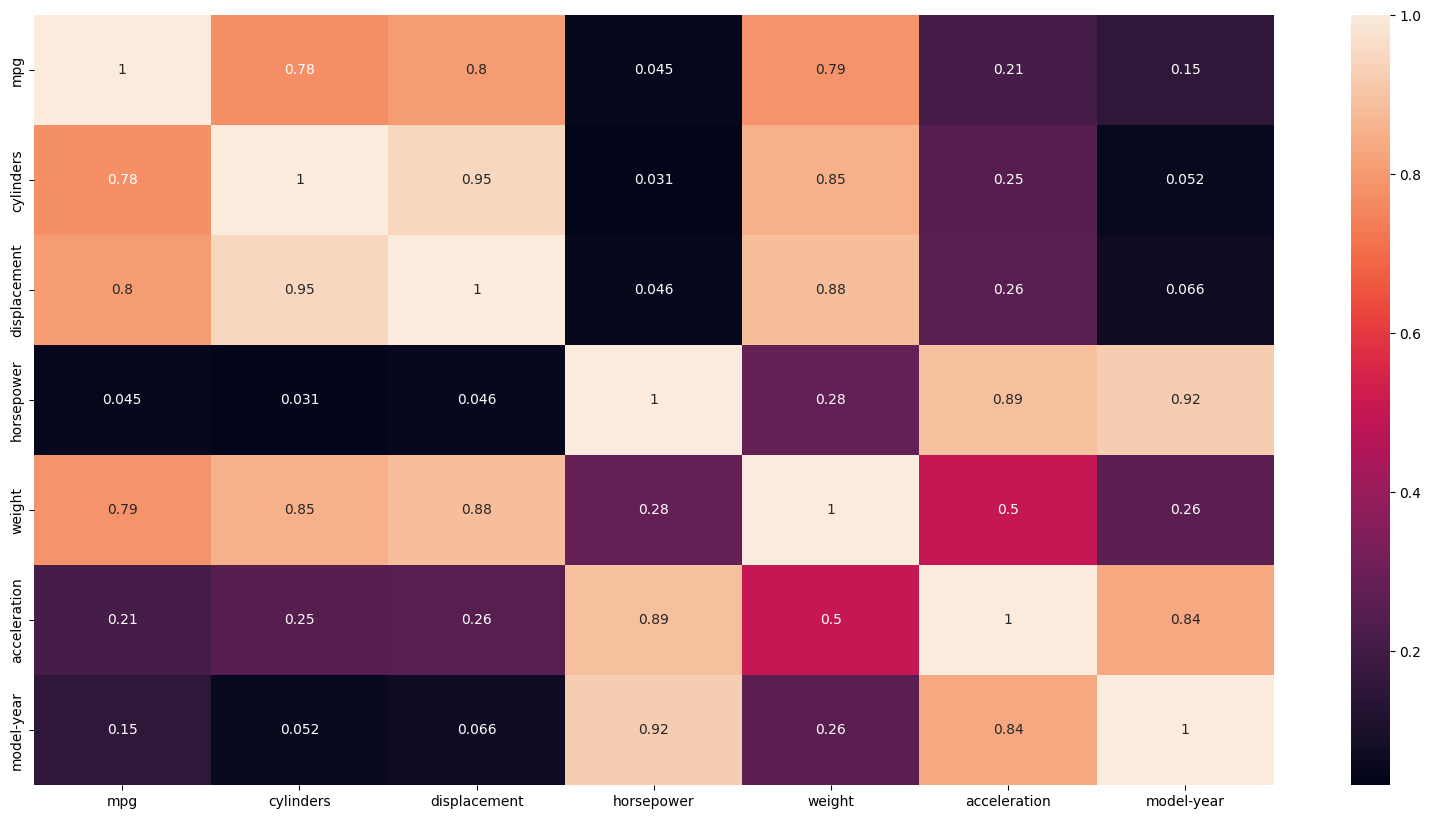

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(test.corr().abs(), annot=True)

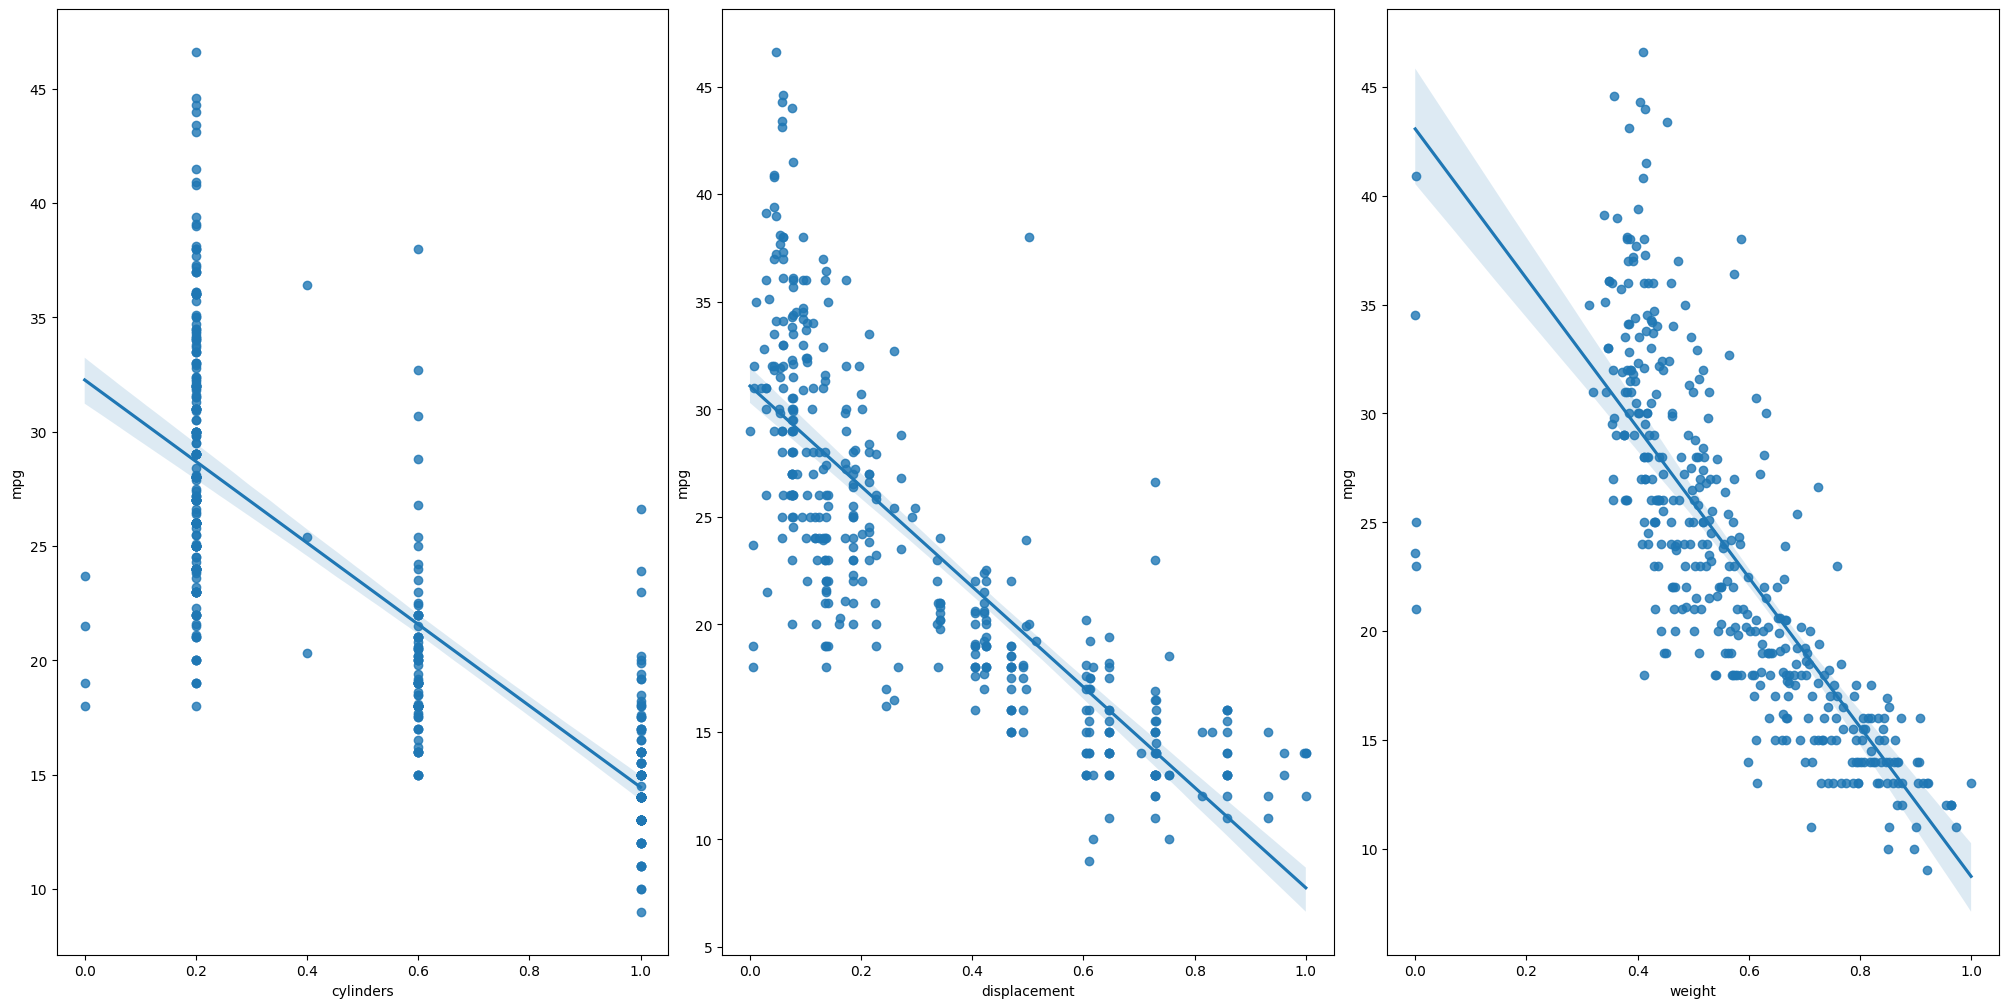

In [ ]:
from sklearn import preprocessing

min_max_acaler = preprocessing.MinMaxScaler()
wanted_columns = ['cylinders', 'displacement', 'weight']
x = test.loc[:,wanted_columns]
y = test['mpg']
x = pd.DataFrame(data=min_max_acaler.fit_transform(x), columns=wanted_columns)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
axs = axs.flatten()
for i, k in enumerate(wanted_columns):
  sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
y = np.log1p(y)
for col in x.columns:
  if np.abs(x[col].skew()) > 0.3:
    x[col] = np.log1p(x[col])

###final word

I get idea of working with this dataset from [Top 10 Regression Datasets: Linear Regression Practice](https://blog.enterprisedna.co/regression-datasets/)

challenges:

1.Null values in 'horsepower' column forced me to use alternative dataset 'test'

2.I didn't chose appropriate dataset file and I faced some problems

thanks to reza shokrzad

author: Donsalehi